In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# consequents and antecedents
temperature = ctrl.Antecedent(np.arange(10, 41, 1), "temperature")
humidity = ctrl.Antecedent(np.arange(20, 101, 1), "humidity")
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), "fan_speed")

/home/codacker/.virtualenvs/fuzzy/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/codacker/.virtualenvs/fuzzy/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/codacker/.virtualenvs/fuzzy/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


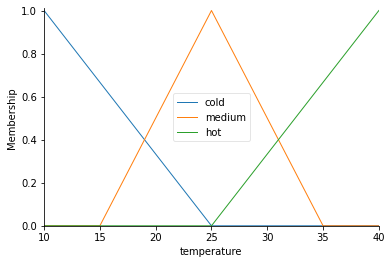

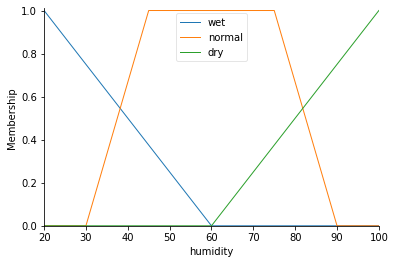

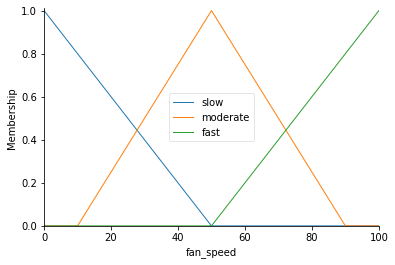

In [3]:
# define temperature membership functions
temperature["cold"] = fuzz.trimf(temperature.universe, [10, 10, 25])
temperature["medium"] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature["hot"] = fuzz.trimf(temperature.universe, [25, 40, 40])

# define humidity membership functions
humidity["wet"] = fuzz.trimf(humidity.universe, [20, 20, 60])
humidity["normal"] = fuzz.trapmf(humidity.universe, [30, 45, 75, 90])
humidity["dry"] = fuzz.trimf(humidity.universe, [60, 100, 100])

# define fan_speed membership functions
fan_speed["slow"] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed["moderate"] = fuzz.trimf(fan_speed.universe, [10, 50, 90])
fan_speed["fast"] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# view membership functions
temperature.view()
humidity.view()
fan_speed.view()

In [4]:
# define rules
"""
If Temperature is Cold and Humidity is Dry Then Fan Speed is Slow
If Temperature is Medium and Humidity is Dry Then Fan Speed is Slow
If Temperature is Cold and Humidity is Wet Then Fan Speed is Slow
If Temperature is Hot and Humidity is Dry Then Fan Speed is Moderate
If Temperature is Medium and Humidity is Normal Then Fan Speed is Moderate
If Temperature is Cold and Humidity is Wet Then Fan Speed is Moderate
If Temperature is Hot and Humidity is Normal Then Fan Speed is Fast
If Temperature is Hot and Humidity is Wet Then Fan Speed is Fast
If Temperature is Medium and Humidity is Wet Then Fan Speed is Fast
"""
rule1 = ctrl.Rule(temperature["cold"] & humidity["dry"], fan_speed["slow"], "If Temperature is Cold and Humidity is Dry Then Fan Speed is Slow")
rule2 = ctrl.Rule(temperature["medium"] & humidity["dry"], fan_speed["slow"], "If Temperature is Medium and Humidity is Dry Then Fan Speed is Slow")
rule3 = ctrl.Rule(temperature["cold"] & humidity["wet"], fan_speed["slow"], "If Temperature is Cold and Humidity is Wet Then Fan Speed is Slow")
rule4 = ctrl.Rule(temperature["hot"] & humidity["dry"], fan_speed["moderate"], "If Temperature is Hot and Humidity is Dry Then Fan Speed is Moderate")
rule5 = ctrl.Rule(temperature["medium"] & humidity["normal"], fan_speed["moderate"], "If Temperature is Medium and Humidity is Normal Then Fan Speed is Moderate")
rule6 = ctrl.Rule(temperature["cold"] & humidity["wet"], fan_speed["moderate"], "Cold and Humidity is Wet Then Fan Speed is Moderate")
rule7 = ctrl.Rule(temperature["hot"] & humidity["normal"], fan_speed["fast"], "If Temperature is Hot and Humidity is Normal Then Fan Speed is Fast")
rule8 = ctrl.Rule(temperature["hot"] & humidity["wet"], fan_speed["fast"], "If Temperature is Hot and Humidity is Wet Then Fan Speed is Fast")
rule9 = ctrl.Rule(temperature["medium"] & humidity["wet"], fan_speed["fast"], "If Temperature is Medium and Humidity is Wet Then Fan Speed is Fast")

In [5]:
# create a controller using rules
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fan_ctrl_sim = ctrl.ControlSystemSimulation(fan_ctrl)

81.94444444444441


/home/codacker/.virtualenvs/fuzzy/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


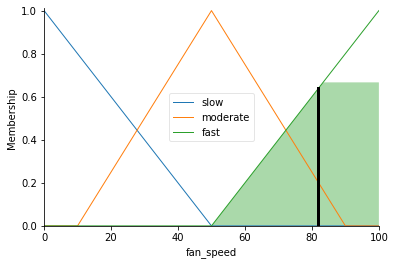

In [6]:
# test the simulation
fan_ctrl_sim.input["temperature"] = 60
fan_ctrl_sim.input["humidity"] = 40
fan_ctrl_sim.compute()
print(fan_ctrl_sim.output["fan_speed"])
fan_speed.view(sim=fan_ctrl_sim)